<a href="https://colab.research.google.com/github/clementbruno/pytorch_practice/blob/main/FINAL_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Wed May  1 20:30:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.2.1+cu121


In [ ]:
device

'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# Self driving cars
# Plant / animals classification
# Radiography

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Fail to extrapolate to new data.
# Good perf on training data bad on unseen one

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Increase size and diversity of dataset
# Data augmentation
# Dropout / optimization

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
!rm -rf data

In [ ]:
from torchvision.datasets import MNIST
from torchvision import transforms

train_data = MNIST(root=".", train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST(root=".", train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 15867199.16it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 228245.26it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 4362936.53it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14227430.00it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_names = train_data.classes

In [ ]:
img, label = train_data[0]

(-0.5, 27.5, 27.5, -0.5)

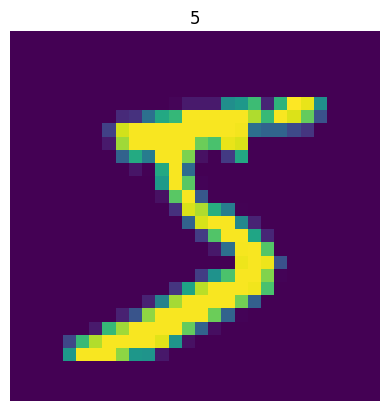

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1,2,0))
plt.title(label)
plt.axis(False)

In [ ]:
pil_transform = transforms.ToPILImage()
image = pil_transform(img)
image

## 6. Visualize at least 5 different samples of the MNIST training dataset.

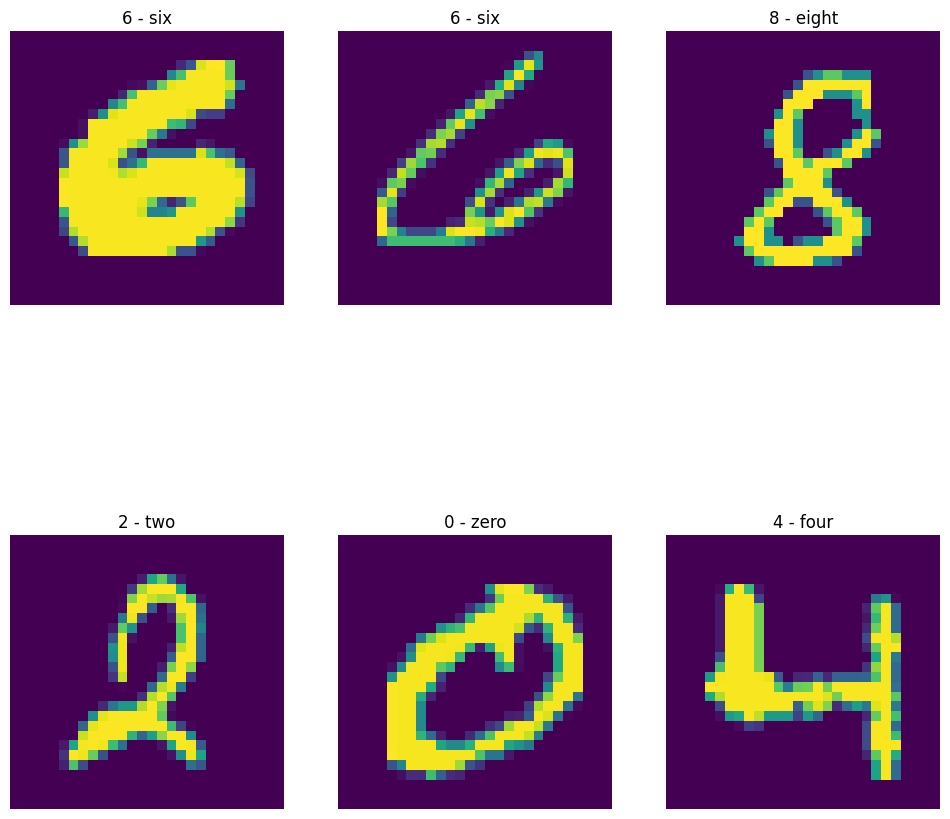

In [ ]:
torch.manual_seed(42)

fig = plt.figure(figsize=(12, 12))
rows, cols = 2, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(low=0, high=len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

In [ ]:
len(train_dataloader)

1875

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            )
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            )
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=490, out_features=output_shape)
        )

    def forward(self, x):
        # y = self.conv_block_1(x)
        # print(y.shape)
        # y = self.conv_block_2(y)
        # print(y.shape)
        # y = self.classifier(y)
        # print(y.shape)
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
# Use this to find in_features of last layer

rand_batch = torch.randn(size=(32, 1, 28, 28))

model = TinyVGG(input_shape=1, hidden_units=10, output_shape=len(class_names))
model.eval()
with torch.inference_mode():
    y = model(rand_batch)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
EPOCHS=5

for epoch in range(1, EPOCHS + 1):
    train_loss = 0
    train_acc = 0
    model.to(device)
    model.train()
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = loss_fn(logits, y)
        train_loss += loss

        y_preds = torch.softmax(logits, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
        acc = (y_preds == y).sum() / len(y)
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_logits = model(X_test)
            loss = loss_fn(test_logits, y_test)
            test_loss += loss

            y_test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
            acc = (y_test_preds == y_test).sum() / len(y_test)
            test_acc += acc

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f}")
    print(f"Epoch: {epoch} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}")

Epoch: 1 | train loss: 0.8379 | train acc: 0.7207
Epoch: 1 | test loss: 0.1567 | test acc: 0.9515
Epoch: 2 | train loss: 0.1402 | train acc: 0.9573
Epoch: 2 | test loss: 0.0898 | test acc: 0.9714
Epoch: 3 | train loss: 0.1010 | train acc: 0.9686
Epoch: 3 | test loss: 0.0879 | test acc: 0.9708
Epoch: 4 | train loss: 0.0841 | train acc: 0.9739
Epoch: 4 | test loss: 0.0657 | test acc: 0.9789
Epoch: 5 | train loss: 0.0741 | train acc: 0.9769
Epoch: 5 | test loss: 0.0582 | test acc: 0.9815


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

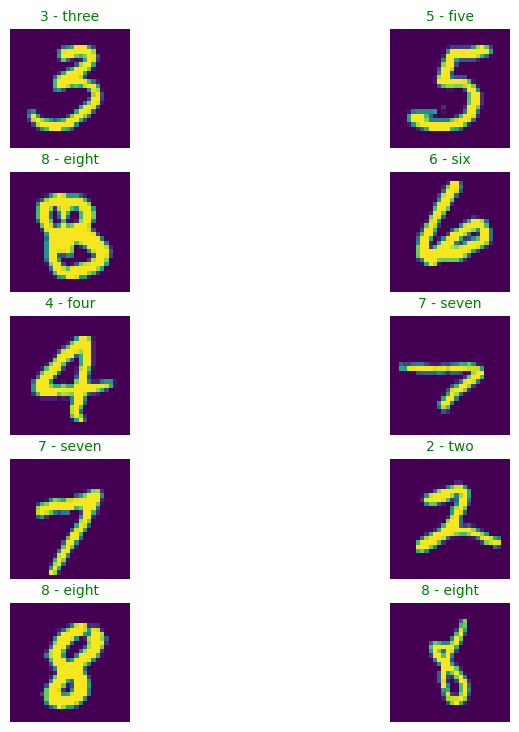

In [ ]:
model.eval()
model.to(device)
with torch.inference_mode():
    fig = plt.figure(figsize=(9, 9))
    rows, cols = 5, 2
    for i in range(1, rows * cols + 1):
        random_idx = torch.randint(low=0, high=len(test_data), size=[1]).item()
        image, label = test_data[random_idx]
        image = image.to(device)
        logits = model(image.unsqueeze(dim=0))
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        predicted_class = class_names[y_pred]
        actual_class = class_names[label]
        fig.add_subplot(rows, cols, i)
        plt.imshow(image.to('cpu').permute(1, 2, 0).numpy())
        if predicted_class == actual_class:
            plt.title(predicted_class, fontsize=10, c="g") # green text if correct
        else:
            plt.title(f"Predicted: {predicted_class} | Actual: {actual_class}", fontsize=10, c="r") # red text if wrong

        plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
model.eval()
model.to(device)
y_preds = []
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        logits = model(X)
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        y_preds.append(y_pred.to('cpu'))

y_pred_tensor = torch.cat(y_preds)

len(y_pred_tensor)

10000

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
mlxtend version: 0.23.1


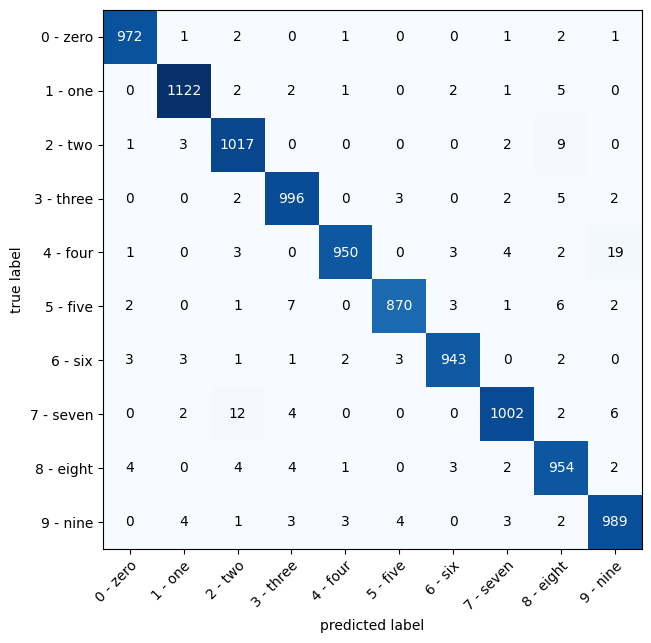

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

(-0.5, 63.5, 63.5, -0.5)

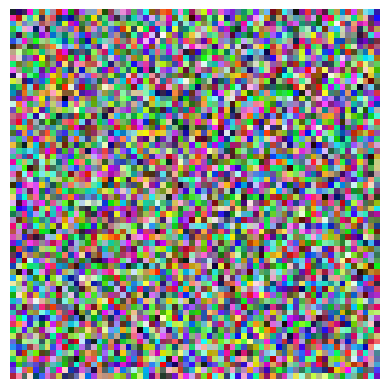

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])
plt.imshow(random_tensor.squeeze().permute(1, 2, 0))
plt.axis(False)

In [ ]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1)
print(random_tensor.shape)
res = conv_layer(random_tensor)
res.shape

torch.Size([1, 3, 64, 64])


torch.Size([1, 64, 32, 32])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
from torchvision.datasets import FashionMNIST

train_data = FashionMNIST(root=".", train=True, transform=transforms.ToTensor(), download=True)
test_data = FashionMNIST(root=".", train=False, transform=transforms.ToTensor(), download=True)

len(train_data), len(test_data), train_data.classes

100%|██████████| 26421880/26421880 [00:02<00:00, 11742621.03it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211039.43it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:06<00:00, 736438.61it/s] 


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6445455.82it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000,
 10000,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [ ]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
class_names = train_data.classes

In [ ]:
image, label = next(iter(train_dataloader))
image.shape, label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
model_2 = TinyVGG(input_shape=1, hidden_units=10, output_shape=len(class_names))

In [ ]:
model_2.to(device)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
from tqdm.auto import tqdm

EPOCHS=10

for epoch in tqdm(range(EPOCHS)):
    train_loss = 0
    train_accuracy = 0

    model_2.train()
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        logits = model_2(X)
        loss = loss_fn(logits, y)
        train_loss += loss
        y_preds = torch.softmax(logits, dim=1).argmax(dim=1)
        acc = (y_preds == y).sum() / len(y)
        train_accuracy += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    test_loss = 0
    test_accuracy = 0

    model_2.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_logits = model_2(X_test)
            loss = loss_fn(test_logits, y_test)
            test_loss += loss
            y_preds_test = torch.softmax(test_logits, dim=1).argmax(dim=1)
            acc = (y_preds_test == y_test).sum() / len(y_test)
            test_accuracy += acc

        train_loss /= len(train_dataloader)
        train_accuracy /= len(train_dataloader)
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train accuracy: {train_accuracy:.4f}")
    print(f"Epoch: {epoch} | Test loss: {test_loss:.4f} | Test accuracy: {test_accuracy:.4f}")
    print("-----------------------")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.2429 | Train accuracy: 0.5458
Epoch: 0 | Test loss: 0.6648 | Test accuracy: 0.7621
-----------------------
Epoch: 1 | Train loss: 0.5403 | Train accuracy: 0.8047
Epoch: 1 | Test loss: 0.5160 | Test accuracy: 0.8063
-----------------------
Epoch: 2 | Train loss: 0.4537 | Train accuracy: 0.8368
Epoch: 2 | Test loss: 0.4490 | Test accuracy: 0.8421
-----------------------
Epoch: 3 | Train loss: 0.4146 | Train accuracy: 0.8515
Epoch: 3 | Test loss: 0.4192 | Test accuracy: 0.8503
-----------------------
Epoch: 4 | Train loss: 0.3901 | Train accuracy: 0.8598
Epoch: 4 | Test loss: 0.4081 | Test accuracy: 0.8558
-----------------------
Epoch: 5 | Train loss: 0.3702 | Train accuracy: 0.8680
Epoch: 5 | Test loss: 0.3740 | Test accuracy: 0.8672
-----------------------
Epoch: 6 | Train loss: 0.3539 | Train accuracy: 0.8738
Epoch: 6 | Test loss: 0.3643 | Test accuracy: 0.8724
-----------------------
Epoch: 7 | Train loss: 0.3396 | Train accuracy: 0.8791
Epoch: 7 | Test loss:

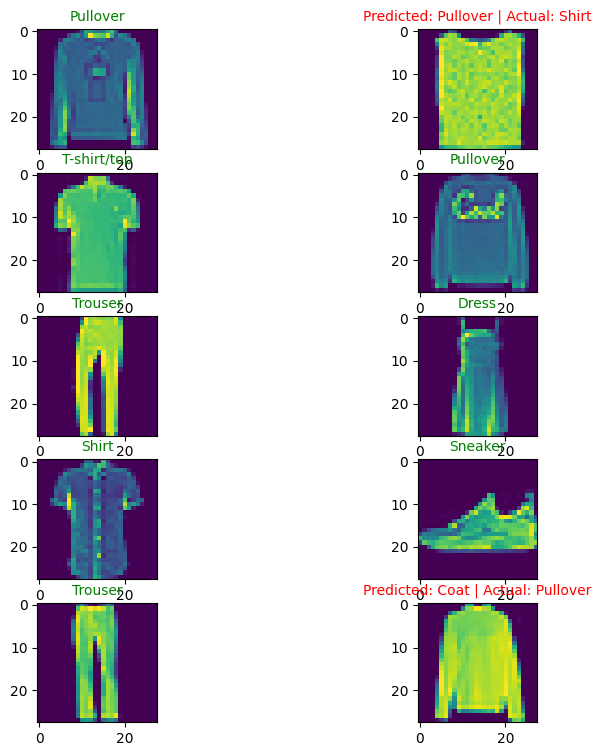

In [ ]:
model_2.eval()
model_2.to(device)
with torch.inference_mode():
    fig = plt.figure(figsize=(9, 9))
    rows, cols = 5, 2
    for i in range(1, rows*cols + 1):
        random_idx = torch.randint(low=0, high=len(test_data), size=[1]).item()
        image, label = test_data[random_idx]
        image = image.to(device)
        logits = model_2(image.unsqueeze(dim=0))
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        predicted_class = class_names[y_pred]
        actual_class = class_names[label]
        fig.add_subplot(rows, cols, i)
        plt.imshow(image.to('cpu').permute(1, 2, 0).numpy())
        if predicted_class == actual_class:
            plt.title(predicted_class, fontsize=10, c='g')
        else:
            plt.title(f"Predicted: {predicted_class} | Actual: {actual_class}", fontsize=10, c='r')

In [ ]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        logits = model_2(X)
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        y_preds.append(y_pred)

y_preds_tensor = torch.cat(y_preds)

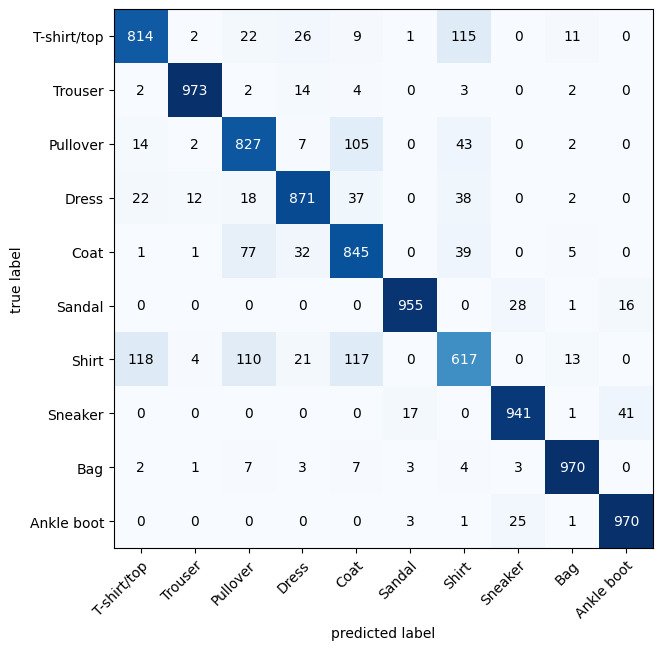

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor.to('cpu'), target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)